<a href="https://colab.research.google.com/github/RiseAboveAll/PYTORCH_Learning/blob/master/Pytorch_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# Linear Regression - Basic

In [ ]:
# Equation of Line y=w*x + b

w=torch.tensor(3.0,requires_grad=True)
b=torch.tensor(0.01,requires_grad=True)



In [ ]:
def forward(x):
  y=w*x+b
  return y

In [ ]:
x=torch.tensor(2.0)
forward(x)

tensor(6.0100, grad_fn=<AddBackward0>)

In [ ]:
x=torch.tensor([[2.0],[3]])
forward(x)

tensor([[6.0100],
        [9.0100]], grad_fn=<AddBackward0>)

# Linear Class

In [ ]:
#@title Set seed for generating random numbers , when we construct model using nn.Linear , it will be given random values for weights and biases for Linear class.Hence to make random values consistent we initializes seed  
torch.manual_seed(1)

In [ ]:
# Create Linear Object
model=nn.Linear(in_features=1,out_features=1,bias=True)

In [ ]:
print(model.bias,model.weight)

Parameter containing:
tensor([-0.4414], requires_grad=True) Parameter containing:
tensor([[0.5153]], requires_grad=True)


In [ ]:
x=torch.tensor([[2.0],[3.3]])
print(model(x))

tensor([[0.5891],
        [1.2590]], grad_fn=<AddmmBackward>)


# Custom Module

In [ ]:
# We will use inheritance that this class inherit the base class nn.Module, we inherit methods from this parent class 
class LR(nn.Module):
  def __init__(self,input_size=1,output_size=1):# __init__ is a constructor 
    # For inheritance from parent class use super()
    super().__init__()
    #object we want to initialize
    self.Linear=nn.Linear(input_size,output_size)
  def forward(self,x):
    pred=self.Linear(x)
    return pred
    


In [ ]:
torch.manual_seed(1)
model=LR(1,1)
print(list(model.parameters()))

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


In [ ]:
x=torch.tensor([2.1])
model.forward(x)

tensor([0.6407], grad_fn=<AddBackward0>)

# Creating Dataset

In [ ]:
#torch.randn(rows,cols)
x=torch.randn(100,1)*10
y=x + torch.randn(100,1)

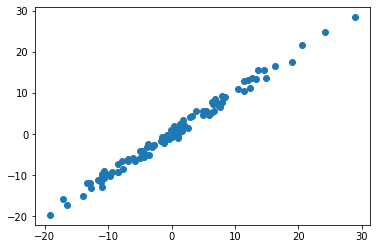

In [ ]:
plt.scatter(x,y)

In [ ]:
# We will use inheritance that this class inherit the base class nn.Module, we inherit methods from this parent class 
class LR(nn.Module):
  def __init__(self,input_size=1,output_size=1):# __init__ is a constructor 
    # For inheritance from parent class use super()
    super().__init__()
    #object we want to initialize
    self.Linear=nn.Linear(input_size,output_size)
  def forward(self,x):
    pred=self.Linear(x)
    return pred
    


In [ ]:
torch.manual_seed(1)
model=LR(1,1)
[w,b]=model.parameters()
print(w,b)

Parameter containing:
tensor([[0.5153]], requires_grad=True) Parameter containing:
tensor([-0.4414], requires_grad=True)


In [ ]:
#@title Adding .item() method returns python numbers
w1=w[0][0].item() # alternative is w[0,0]
b1=b[0].item()

In [ ]:
def get_params():
  return (w[0,0].item(),b[0].item())

In [ ]:
def plot_fit(title):
  plt.title=title
  w1,b1=get_params()
  x1=np.array([-30,30])
  y1=w1*x1+b1
  plt.plot(x1,y1,'r')
  plt.scatter(x,y)
  plt.show()

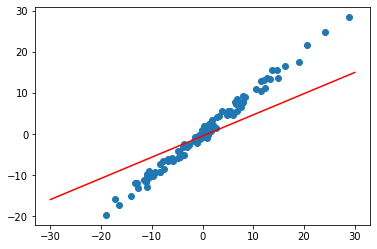

In [ ]:
plot_fit('Initial Model')

 **This is not the line which best fits the data , we need to use optimisation model to get best fit line**

# Loss Function

- Gradient of the error function should take us in the direction of the greatest increase in error , so naturally moving towards negative of the cost function , we move in the direction of dreatest descent.

- Error depends on the weights and bias

- Hence for gradient descent we take partial derivative of error function wrt weights(w) and bias (b). dL/dw=-2x(y-y_hat);dL/db=-2(y-y_hat)

- w_u=w_o-(a*dL/dw) ; b_u=b_o - (a*dL/db)

- This Gradient Descent is batch gradient descent which updates the weights and bias of whole data set, where as **Stochastic Gradient Descent** minimizes the total loss one sample at a time , it reaches convergence much faster as it frequently updates the weights of the model of the same sample size 



In [ ]:
criterion=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=.001,momentum=.07)


As the number of epochs increases , the more time it is able to update the weights of the neural network, which hence minimizes the error and produces optimal results!

If it is too many epochs, it can lead to overfitting !



In [ ]:
epochs=100
losses=[]
for i in range(epochs):
  
  y_pred=model.forward(x)
  loss= criterion(y_pred,y)
  print('epoch :',i,'Loss :',loss.item())
  losses.append(loss)
  #compute the gradient of loss wrt parameters
  optimizer.zero_grad()
  loss.backward()
  #update the parameters
  optimizer.step()



epoch : 0 Loss : 22.276521682739258
epoch : 1 Loss : 15.575677871704102
epoch : 2 Loss : 10.660954475402832
epoch : 3 Loss : 7.405991077423096
epoch : 4 Loss : 5.272241115570068
epoch : 5 Loss : 3.8748481273651123
epoch : 6 Loss : 2.9596266746520996
epoch : 7 Loss : 2.360037326812744
epoch : 8 Loss : 1.9670552015304565
epoch : 9 Loss : 1.7093141078948975
epoch : 10 Loss : 1.5401004552841187
epoch : 11 Loss : 1.428836464881897
epoch : 12 Loss : 1.3555076122283936
epoch : 13 Loss : 1.307011604309082
epoch : 14 Loss : 1.2747728824615479
epoch : 15 Loss : 1.253177285194397
epoch : 16 Loss : 1.2385514974594116
epoch : 17 Loss : 1.2284891605377197
epoch : 18 Loss : 1.2214163541793823
epoch : 19 Loss : 1.216302752494812
epoch : 20 Loss : 1.2124732732772827
epoch : 21 Loss : 1.209486484527588
epoch : 22 Loss : 1.207053780555725
epoch : 23 Loss : 1.2049853801727295
epoch : 24 Loss : 1.2031577825546265
epoch : 25 Loss : 1.2014892101287842
epoch : 26 Loss : 1.1999273300170898
epoch : 27 Loss : 1.

Text(0, 0.5, 'Loss')

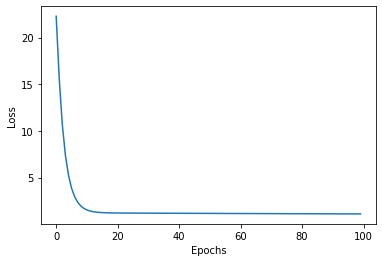

In [ ]:
plt.plot(range(epochs),losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')

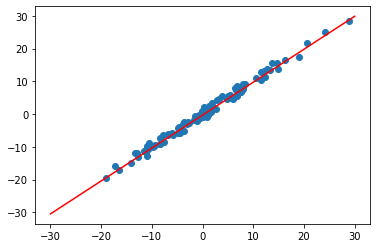

In [ ]:
plot_fit('Trained Model')

# Perceptron

## Creating a Data Set

In [ ]:
n_pts=100
centers=[[-.5,.5],[.5,-.5]]
#Importing Data Set, make_blob() creates the cluster of data points randomly centered around chosen centered point
X,y=datasets.make_blobs(n_samples=n_pts,random_state=123,centers=centers,cluster_std=0.4, )
def scatter_plot():
  plt.scatter(X[y==0,0],X[y==0,1])
  plt.scatter(X[y==1,0],X[y==1,1])

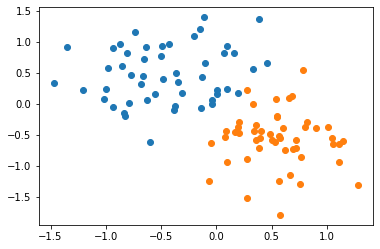

In [ ]:
scatter_plot()

In [ ]:
torch.Tensor?

In [ ]:
#Convert numpy data to tensor
X_data=torch.Tensor(X)
y_data=torch.Tensor(y.reshape(n_pts,1))

In [ ]:
class Model(nn.Module):
  def __init__(self,input_size,output_size):
    super().__init__()
    self.Linear = nn.Linear(input_size,output_size)
  def forward(self,x):
    pred=torch.sigmoid(self.Linear(x))
    return pred
  def pred(self,x):
    pred=self.forward(x)
    if pred >= 0.5:
      return 1
    else:
      return 0


In [ ]:
torch.manual_seed(2)
model=Model(2,1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683]], requires_grad=True), Parameter containing:
tensor([0.1939], requires_grad=True)]


In [ ]:
[w,b]=model.parameters()
W1,W2=w.view(2)
b1=b[0]
print(W1.item(),W2.item(),b1.item())

0.16220331192016602 -0.1682732105255127 0.19390898942947388


In [ ]:
 def get_params():
   return (W1.item(),W2.item(),b[0].item())

In [ ]:
def plot_fit(title):
  plt.title=title
  W1,W2,b=get_params()
  x1=np.array([-2.0,2.0])
  x2=-(W1*x1 + b)/W2
  plt.plot(x1,x2,'r')
  scatter_plot()
  plt.show()

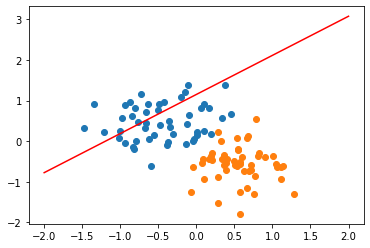

In [ ]:
plot_fit('Initial Model')

In [ ]:
criterion=nn.BCELoss( )
optimizer=torch.optim.Adam(model.parameters(),lr=.001)

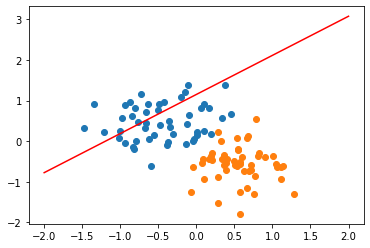

In [ ]:
plot_fit('Training Data')

In [ ]:
epochs=1000
losses=[]
for i in range(epochs):
  y_pred=model.forward(X_data)
  loss=criterion(y_pred,y_data)
  if (i+1)%5==0:
    print("epochs :", i, "Loss :", loss.item())
  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()



epochs : 4 Loss : 0.6165003776550293
epochs : 9 Loss : 0.6139997243881226
epochs : 14 Loss : 0.6115145683288574
epochs : 19 Loss : 0.6090461015701294
epochs : 24 Loss : 0.6065950393676758
epochs : 29 Loss : 0.60416179895401
epochs : 34 Loss : 0.6017467975616455
epochs : 39 Loss : 0.5993503332138062
epochs : 44 Loss : 0.596972644329071
epochs : 49 Loss : 0.5946134924888611
epochs : 54 Loss : 0.592272937297821
epochs : 59 Loss : 0.5899507999420166
epochs : 64 Loss : 0.5876470804214478
epochs : 69 Loss : 0.5853615999221802
epochs : 74 Loss : 0.5830938816070557
epochs : 79 Loss : 0.5808440446853638
epochs : 84 Loss : 0.5786115527153015
epochs : 89 Loss : 0.5763965249061584
epochs : 94 Loss : 0.5741984248161316
epochs : 99 Loss : 0.5720173120498657
epochs : 104 Loss : 0.5698527693748474
epochs : 109 Loss : 0.5677045583724976
epochs : 114 Loss : 0.5655726194381714
epochs : 119 Loss : 0.563456654548645
epochs : 124 Loss : 0.5613563060760498
epochs : 129 Loss : 0.5592716336250305
epochs : 134 

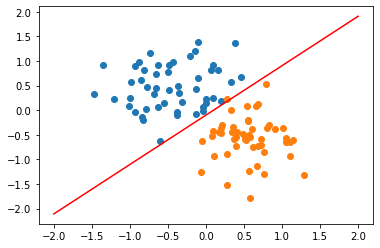

In [ ]:
plot_fit('Training Data')